<h1>About this Exercise</h1>

This tutorial will provide you with enough information to finish CIS537 projects that use [PyTorch](https://pytorch.org/) but it is not meant to be a comprehensive tutorial for PyTorch. For a complete tutorial on Pytorch, review PyTorch's official tutorial:
https://pytorch.org/tutorials/

<h3>What is PyTorch?</h3>

PyTorch is a python-based deep learning platform that provides GPU support. To start, first import the PyTorch packages and some of its some packages.

In [1]:
# import PyTorch and its subpackages
import torch
import torch.nn as nn
from torch.nn import functional as F

# Also other packages for convenience
import numpy as np
import helper as h
import matplotlib.pyplot as plt

<h3>0. Tensors</h3>

Tensors are the basic building blocks of PyTorch. They are similar to NumPy's ndarrays. For example, to create a tensor of all zeros with size (3, 2), you can do the following:

In [2]:
X = torch.zeros(3, 2) # this syntax is similar to NumPy. In Numpy, we would do np.zero(3,2)

print(X)
print(X.shape)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
torch.Size([3, 2])


You can also convert a NumPy array to a torch Tensor: 

In [3]:
X_numpy = np.arange(15)
print('NumPy Array: ', X_numpy)

X_tensor = torch.tensor(X_numpy)
print('Pytorch Tensor: ', X_tensor)

NumPy Array:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Pytorch Tensor:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])


You can also convert a torch Tensor to a NumPy array

In [4]:
X_tensor_numpy = X_tensor.numpy()

print(X_tensor_numpy)
print(type(X_tensor_numpy))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
<class 'numpy.ndarray'>


Just like NumPy, you can do arithmetic operations on torch Tensor

In [5]:
# Create two numpy arrays
A = np.array([1, 2, 3])
B = np.array([1, 5, 6])

# Convert the two numpy arrays into torch Tensor
A_tensor = torch.Tensor(A)
B_tensor = torch.Tensor(B)

# addition / subtraction
print('Addition in Numpy', A + B)
print('Addition in PyTorch', A_tensor + B_tensor)
print()

# scalar multiplication
print('Scalar Multiplication in Numpy', 3*A)
print('Scalar Multiplication in PyTorch', 3*A_tensor)
print()

# elementwise multiplication
print('Elementwise Multiplication in Numpy', A*B)
print('Elementiwse Multiplication in PyTorch', A_tensor*B_tensor)
print()

# matrix multiplication
# this is slightly different from NumPy
print('Elementwise Multiplication in Numpy', A@B)
print('Elementiwse Multiplication in PyTorch', torch.matmul(A_tensor, B_tensor))
print()

Addition in Numpy [2 7 9]
Addition in PyTorch tensor([2., 7., 9.])

Scalar Multiplication in Numpy [3 6 9]
Scalar Multiplication in PyTorch tensor([3., 6., 9.])

Elementwise Multiplication in Numpy [ 1 10 18]
Elementiwse Multiplication in PyTorch tensor([ 1., 10., 18.])

Elementwise Multiplication in Numpy 29
Elementiwse Multiplication in PyTorch tensor(29.)



Some other useful tensor operations:

In [6]:
# Elementwise comparison
print('NumPy: ', A == B)
print('PyTorch: ', A_tensor == B_tensor)
print()

# Generate a random matrix
C = np.array([[10, 9, 8], [6, 7, 5], [1, 2, 3]])
C_tensor = torch.Tensor(C)

print('C', C)
print()

# Sum along the row
# In NumPy, we specify the axis.
# In PyTorch, we specify the dim
print('NumPy: ', np.sum(C, axis=0))
print('PyTorch: ' ,torch.sum(C_tensor, dim=0))
print()

# Find the mean along the column
# In NumPy, we specify the axis.
# In PyTorch, we specify the dim
print('NumPy: ', np.mean(C, axis=1))
print('PyTorch: ', torch.mean(C_tensor, dim=1))
print()


# Find the argmax along the column
# In NumPy, we specify the axis.
# In PyTorch, we specify the dim
print('NumPy: ', np.argmax(C, axis=1))
print('PyTorch: ', torch.argmax(C_tensor, dim=1))
print()

NumPy:  [ True False False]
PyTorch:  tensor([ True, False, False])

C [[10  9  8]
 [ 6  7  5]
 [ 1  2  3]]

NumPy:  [17 18 16]
PyTorch:  tensor([17., 18., 16.])

NumPy:  [9. 6. 2.]
PyTorch:  tensor([9., 6., 2.])

NumPy:  [0 1 2]
PyTorch:  tensor([0, 1, 2])



<h3>1. Creating a model</h3>

In the following sections, we are going to develop a multilayer perceptron for our favorite spiral dataset. To start, let's generate and visualize the dataset. 

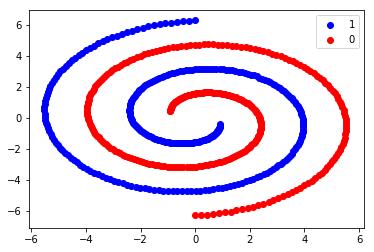

In [7]:
# Running the following code with generate
# 600 datapoints
# 300 in class 0 
# 300 in class 1
X, y = h.spiraldata(N=300)

h.visualize_2D(X.numpy(), y.numpy())

Now, we will create a multilayer perceptron. In Pytorch, to create a model, we need to create a model class that overloads <code>nn.Module</code> and implement the <code>forward()</code> function that performs forward propagation.

In [8]:
# create a model class named MLP
# overloads nn.Module 

# This MLP is a simple multilayer perceptron with 3-hidden layers 
# with ReLU transition function
class MLP(nn.Module):
    def __init__(self):
        # call the constructor of the inherited module
        # this line is always necessary
        super().__init__()
        
        # All the layers with trainable parameters have to be 
        # defined in the constructor
        # Create a linear layer that takes input of dimension 2
        # and outputs a vector of dimension 64
        # Similarly, create the consequent layers
        self.fc1 = nn.Linear(in_features=2, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=16)
        
        # The last layer should output a two dimensional vector
        # where the first dimension corresponds to the network's
        # belief that the input belongs to class 0
        # and similarly, second dimension corresponds to class 1
        self.fc4 = nn.Linear(in_features=16, out_features=2)
        
    def forward(self, x):
        # apply the first linear transformation to input x
        # then apply the ReLU transition to get the output
        # of the first hidden layer o1
        # Similar procedures are done to get o2, o3
        o1 = F.relu(self.fc1(x))
        o2 = F.relu(self.fc2(o1))
        o3 = F.relu(self.fc3(o2))
        
        # We do not apply any transition function to the output
        # of the final hidden layer
        o4 = self.fc4(o3)
        return o4

Now, we can instantiate a model and do forward propagation by running the following cell: 

In [9]:
# Instantiate a model
model = MLP()

# Run forward propagation
logits = model(X)

# Print the output of the model
# This should be (600, 2)
print(logits.shape)

torch.Size([600, 2])


<h3>2. Define a loss function</h3>

To train a neural network, we need a loss function. Since we are doing a classification problem, we are going to use the cross entropy loss. Luckily, Pytorch has implemented this for us. For a comprehensive list of PyTorch implemented loss function, please check out: https://pytorch.org/docs/1.1.0/nn.html#loss-functions

In [10]:
# create the cross entropy loss function
# this loss function takes in logits and labels and return the loss value
# Concretely, loss_fn(logits, y) returns the cross entropy loss between
# the prediction and ground truth
loss_fn = nn.CrossEntropyLoss()

<h3>3. Define an optimizer </h3>
We are going to use an SGD optimizer to optimize our MLP. Conveniently, PyTorch has implemented SGD for us. 

In [11]:
# torch.optim.SGD is the optimizer that PyTorch implemented
# it takes the model's parameter, which you can get by calling
# model.parameters()
# and learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

<h3>4. Training the Network </h3>

With all the ingredients we have, we are ready to train our multilayer perceptrons.

In [12]:
# Num_epochs is the number we are going to go through the dataset
# This is a simple dataset so we are just going to do a vanilla Gradient Descent
# rather than minibatch Stochastic Gradient Descent
num_epochs = 2000

losses = []
for epoch in range(num_epochs):
    # Set the model to training mode
    # This step is always necessary during training 
    model.train()
    
    # PyTorch keeps track of all the gradients generated 
    # throughout the whole training procedure
    # But we only need the gradient of the current time step
    # so we need to zero-out the gradient buffer
    optimizer.zero_grad()
    
    # Do forward propagation
    logits = model(X)
    
    # Calculate the loss 
    loss = loss_fn(logits, y)
    
    # Do backward propagation
    loss.backward()
    
    # Update the model parameters 
    optimizer.step()
    
    # Get the prediction
    prediction = torch.argmax(logits, dim=1)
    
    # PyTorch supports elements elementwise comparison
    acc = torch.mean((prediction == y).float())
    
    losses.append(loss.item())
    
    # print the loss value every 50 epochs
    if (epoch + 1) % 50 == 0:
        print('Epoch [{}/ {}], Loss: {:.4f} '.format(epoch + 1, num_epochs, losses[-1]))

Epoch [50/ 2000], Loss: 0.6644 
Epoch [100/ 2000], Loss: 0.6552 
Epoch [150/ 2000], Loss: 0.6492 
Epoch [200/ 2000], Loss: 0.6425 
Epoch [250/ 2000], Loss: 0.6345 
Epoch [300/ 2000], Loss: 0.6255 
Epoch [350/ 2000], Loss: 0.6155 
Epoch [400/ 2000], Loss: 0.6055 
Epoch [450/ 2000], Loss: 0.5921 
Epoch [500/ 2000], Loss: 0.5767 
Epoch [550/ 2000], Loss: 0.5574 
Epoch [600/ 2000], Loss: 0.5370 
Epoch [650/ 2000], Loss: 0.5131 
Epoch [700/ 2000], Loss: 0.4780 
Epoch [750/ 2000], Loss: 0.4383 
Epoch [800/ 2000], Loss: 0.3535 
Epoch [850/ 2000], Loss: 0.2462 
Epoch [900/ 2000], Loss: 0.2089 
Epoch [950/ 2000], Loss: 0.2256 
Epoch [1000/ 2000], Loss: 0.1099 
Epoch [1050/ 2000], Loss: 0.0768 
Epoch [1100/ 2000], Loss: 0.0407 
Epoch [1150/ 2000], Loss: 0.0266 
Epoch [1200/ 2000], Loss: 0.0187 
Epoch [1250/ 2000], Loss: 0.0143 
Epoch [1300/ 2000], Loss: 0.0113 
Epoch [1350/ 2000], Loss: 0.0094 
Epoch [1400/ 2000], Loss: 0.0079 
Epoch [1450/ 2000], Loss: 0.0067 
Epoch [1500/ 2000], Loss: 0.0058 


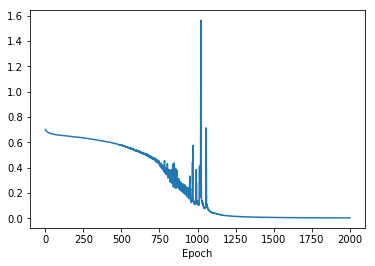

In [13]:
# Plot the training loss
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.show()

<h3>5. Evaluate the Network </h3>

In [14]:
# Need to go into eval mode
model.eval()

# Do a forward pass and tell PyTorch to not keep track of
# the gradient calculation to save memory
with torch.no_grad():
    logits = model(X)

# make prediction
prediction = torch.argmax(logits, dim=1)

# Calculate the accracuy
print('Accuracy: {:.2f}%'.format(torch.mean((prediction == y).float()).item() * 100))

Accuracy: 100.00%


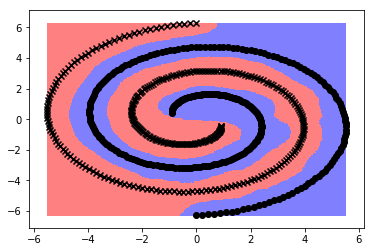

In [15]:
# visualize the model
h.visclassifier(model, X.numpy(), y.numpy())

<h3>(Optional) Exercise</h3>

In the following cell, you will create another multilayer perceptron with 2 hidden layers. The first hidden layer has 256 neurons and the second hidden layer has 128 neurons. We have provided the following code stub. What you need to is to fill in the blanks. 

In [16]:
class MLP_v2(nn.Module):
    def __init__(self):
        # call the constructor of the inherited module
        # this line is always necessary
        super().__init__()
        
        # TODO: fill in the blank with the right layer
        self.fc1 = nn.Linear(in_features=2, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=2)
        
    def forward(self, x):
        o1 = F.relu(self.fc1(x))
        o2 = F.relu(self.fc2(o1))
        o3 = self.fc3(o2)
        return o3

In [17]:
model_v2 = MLP_v2()

# If you create the right model, you should be able to pass the following test

# Checking the size of the parameters in the first layer
fc1_parameters = list(model_v2.fc1.parameters())

# the weight should have size (256, 2)
assert fc1_parameters[0].shape == (256, 2)
# the bias should have size (256, )
assert fc1_parameters[1].shape == (256, )

# Checking the size of the parameters in the second layer
fc2_parameters = list(model_v2.fc2.parameters())
assert fc2_parameters[0].shape == (128, 256)
assert fc2_parameters[1].shape == (128, )

# Checking the size of the parameters in the last layer
fc3_parameters = list(model_v2.fc3.parameters())
assert fc3_parameters[0].shape == (2, 128)
assert fc3_parameters[1].shape == (2, )

In [18]:
# creating a new optimizer
# Feel free to play around with the learning rate
optimizer_v2 = torch.optim.SGD(model_v2.parameters(), lr=0.1)

In [19]:
# Train the model
num_epochs = 2000

losses = []
for epoch in range(num_epochs):
    # Set the model to training mode
    # This step is always necessary during training 
    model_v2.train()
    
    # PyTorch keeps track of all the gradients generated 
    # throughout the whole training procedure
    # But we only need the gradient of the current time step
    # so we need to zero-out the gradient buffer
    optimizer_v2.zero_grad()
    
    # Do forward propagation
    logits = model_v2(X)
    
    # Calculate the loss 
    loss = loss_fn(logits, y)
    
    # Do backward propagation
    loss.backward()
    
    # Update the model parameters 
    optimizer_v2.step()
    
    # Get the prediction
    prediction = torch.argmax(logits, dim=1)
    
    # PyTorch supports elements elementwise comparison
    acc = torch.mean((prediction == y).float())
    
    losses.append(loss.item())
    
    # print the loss value every 50 epochs
    if (epoch + 1) % 50 == 0:
        print('Epoch [{}/ {}], Loss: {:.4f} '.format(epoch + 1, num_epochs, losses[-1]))

Epoch [50/ 2000], Loss: 0.6368 
Epoch [100/ 2000], Loss: 0.6277 
Epoch [150/ 2000], Loss: 0.6145 
Epoch [200/ 2000], Loss: 0.5986 
Epoch [250/ 2000], Loss: 0.5671 
Epoch [300/ 2000], Loss: 0.5297 
Epoch [350/ 2000], Loss: 0.5102 
Epoch [400/ 2000], Loss: 0.4327 
Epoch [450/ 2000], Loss: 0.4057 
Epoch [500/ 2000], Loss: 0.3723 
Epoch [550/ 2000], Loss: 0.3391 
Epoch [600/ 2000], Loss: 0.2313 
Epoch [650/ 2000], Loss: 0.2486 
Epoch [700/ 2000], Loss: 0.1727 
Epoch [750/ 2000], Loss: 0.0596 
Epoch [800/ 2000], Loss: 0.0351 
Epoch [850/ 2000], Loss: 0.0273 
Epoch [900/ 2000], Loss: 0.0212 
Epoch [950/ 2000], Loss: 0.0175 
Epoch [1000/ 2000], Loss: 0.0149 
Epoch [1050/ 2000], Loss: 0.0129 
Epoch [1100/ 2000], Loss: 0.0112 
Epoch [1150/ 2000], Loss: 0.0099 
Epoch [1200/ 2000], Loss: 0.0089 
Epoch [1250/ 2000], Loss: 0.0081 
Epoch [1300/ 2000], Loss: 0.0073 
Epoch [1350/ 2000], Loss: 0.0067 
Epoch [1400/ 2000], Loss: 0.0062 
Epoch [1450/ 2000], Loss: 0.0057 
Epoch [1500/ 2000], Loss: 0.0053 


In [20]:
# Evaluate the model
# Need to go into eval mode
model_v2.eval()

# Do a forward pass and tell PyTorch to not keep track of
# the gradient calculation to save memory
with torch.no_grad():
    logits = model_v2(X)

# make prediction
prediction = torch.argmax(logits, dim=1)

# Calculate the accracuy
print('Accuracy: {:.2f}%'.format(torch.mean((prediction == y).float()).item() * 100))

Accuracy: 100.00%


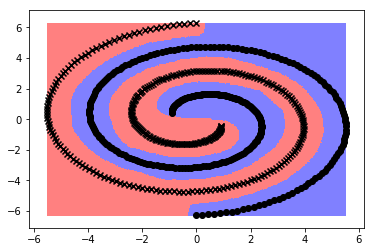

In [21]:
# visualize the model
h.visclassifier(model_v2, X.numpy(), y.numpy())